In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


In [2]:
train = pd.read_csv('/kaggle/input/used-cars-price-prediction/train-data.csv')
test =pd.read_csv('/kaggle/input/used-cars-price-prediction/test-data.csv')
train.shape , test.shape

((6019, 14), (1234, 13))

In [3]:
train_feature = train.drop(['Unnamed: 0' , 'Name' , 'Price' , 'New_Price'] , axis = 'columns').copy()
train_label = train['Price']

In [4]:
test_feature = test.drop(['Unnamed: 0' , 'Name' , 'New_Price'] , axis = 'columns').copy()

In [5]:
train.info() , test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entrie

(None, None)

In [6]:
train_feature.shape 

(6019, 10)

# EDA For Train data

In [7]:
train_feature.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
dtype: int64

In [8]:
train_feature[train_feature['Power'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
208,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
733,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN
1294,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
1385,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
2074,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
2096,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN


In [9]:
train_feature['Power'] = train_feature['Power'].fillna('0 bhp')
train_feature['Power'] = train_feature['Power'].str.replace(' bhp' , '')
train_feature['Power'] = train_feature['Power'].str.replace('null' , '0')
train_feature['Power'] = train_feature['Power'].astype(float)

train_feature['Engine'] = train_feature['Engine'].fillna('0 CC')
train_feature['Engine'] = train_feature['Engine'].str.replace('nan' , '0')
train_feature['Engine'] = train_feature['Engine'].str.replace(' CC' , '')
train_feature['Engine'] = train_feature['Engine'].astype(float)

In [10]:
train_feature['Seats'] = train_feature['Seats'].fillna(0)
train_feature['Seats'].isnull().sum()

0

In [11]:
train_feature['Mileage'].isnull().sum() 

2

# EDA for test data

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [13]:
test_feature['Power'] = test_feature['Power'].fillna('0 bhp')
test_feature['Power'] = test_feature['Power'].str.replace(' bhp' , '')
test_feature['Power'] = test_feature['Power'].str.replace('null' , '0')
test_feature['Power'] = test_feature['Power'].astype(float)

test_feature['Engine'] = test_feature['Engine'].fillna('0 CC')
test_feature['Engine'] = test_feature['Engine'].str.replace('nan' , '0')
test_feature['Engine'] = test_feature['Engine'].str.replace(' CC' , '')
test_feature['Engine'] = test_feature['Engine'].astype(float)

# Data Visualization

<Axes: >

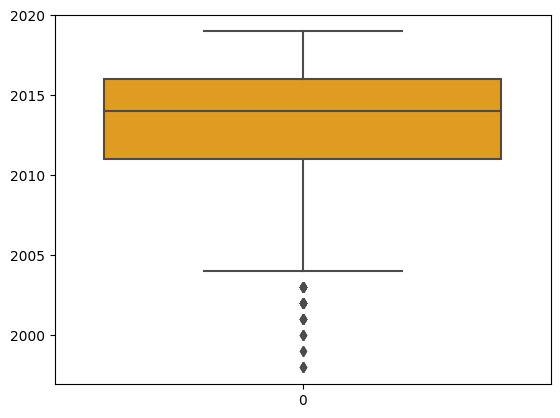

In [14]:
sns.boxplot(train_feature['Year'] , color="orange") 

<Axes: >

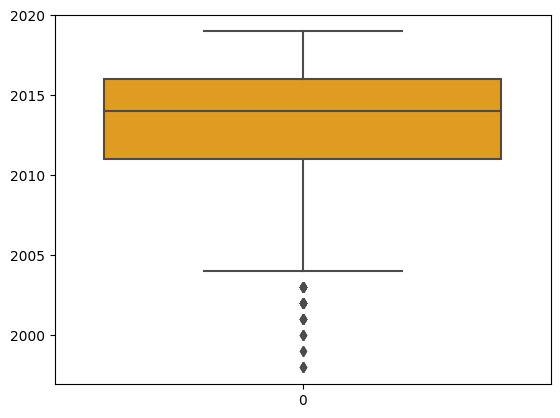

In [15]:
sns.boxplot(train_feature['Year'], color="orange") 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Owner_Type', ylabel='Count'>

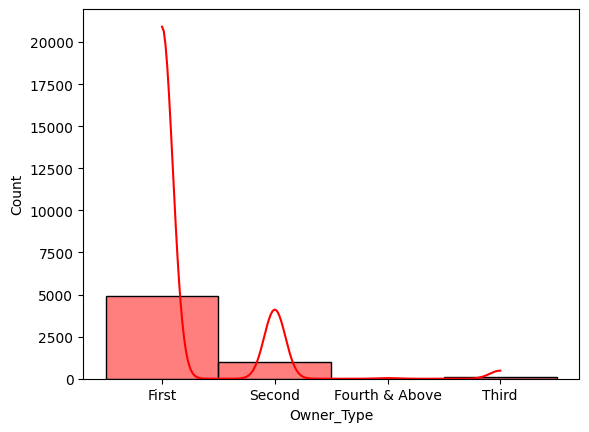

In [16]:
sns.histplot(data  = train_feature , x = 'Owner_Type' , kde=True , color="red")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fuel_Type', ylabel='Count'>

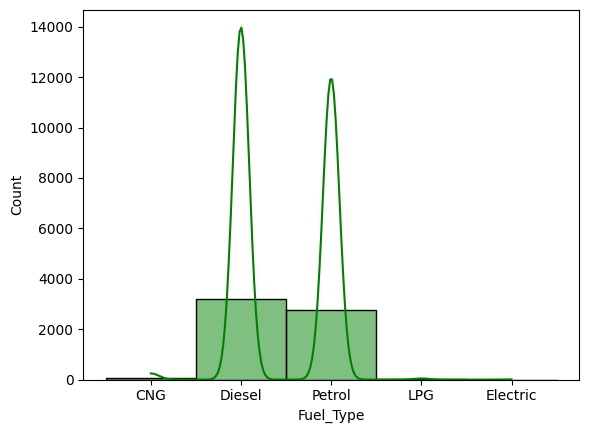

In [17]:
sns.histplot(data  = train_feature , x = 'Fuel_Type' , kde=True , color="green") 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Count'>

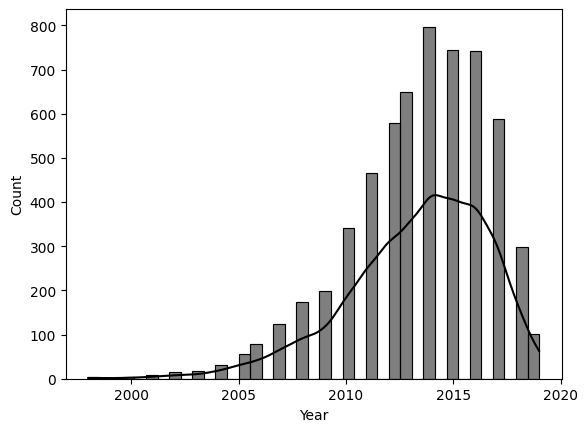

In [18]:
sns.histplot(data  = train_feature , x = 'Year' , kde=True , color="black")

<Axes: >

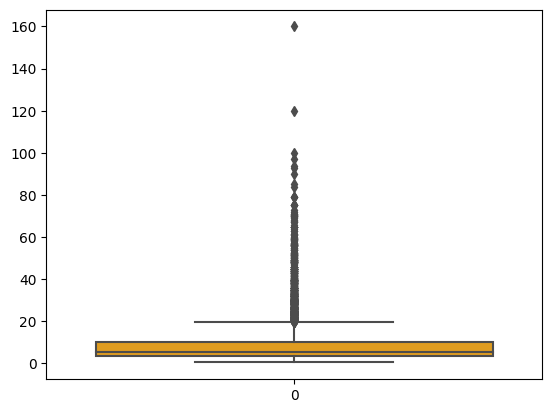

In [19]:
sns.boxplot(train_label, color="orange") 

# Imputation

In [20]:
train_feature.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 470.4+ KB


In [21]:
num_train = train_feature[['Year' , 'Kilometers_Driven' ,'Seats' , 'Power' , 'Engine']]
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'median')
impute.fit(num_train)
impute.statistics_
impute.transform(num_train)

array([[2.010e+03, 7.200e+04, 5.000e+00, 5.816e+01, 9.980e+02],
       [2.015e+03, 4.100e+04, 5.000e+00, 1.262e+02, 1.582e+03],
       [2.011e+03, 4.600e+04, 5.000e+00, 8.870e+01, 1.199e+03],
       ...,
       [2.012e+03, 5.500e+04, 8.000e+00, 1.120e+02, 2.498e+03],
       [2.013e+03, 4.600e+04, 5.000e+00, 6.710e+01, 9.980e+02],
       [2.011e+03, 4.700e+04, 5.000e+00, 5.760e+01, 9.360e+02]])

In [22]:
categ = train_feature[['Kilometers_Driven' , 'Transmission' , 'Fuel_Type' , 'Owner_Type' , 'Location']]
from sklearn.preprocessing import OneHotEncoder
cat_encod = OneHotEncoder(sparse_output = False, handle_unknown='ignore')
y = cat_encod.fit_transform(categ)
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
train_feature.shape , num_train.shape , categ.shape

((6019, 10), (6019, 5), (6019, 5))

In [24]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(num_train)

array([[-1.02713851,  0.14531489, -0.26352296, -0.93656959, -1.00192768],
       [ 0.50216112, -0.19436922, -0.26352296,  0.27948594, -0.04830102],
       [-0.72127858, -0.13958146, -0.26352296, -0.39073867, -0.67371028],
       ...,
       [-0.41541866, -0.0409635 ,  3.00463231,  0.02569422,  1.44745585],
       [-0.10955873, -0.13958146, -0.26352296, -0.77678804, -1.00192768],
       [-0.72127858, -0.12862391, -0.26352296, -0.94657827, -1.10316886]])

In [25]:
from sklearn.preprocessing import RobustScaler
scalerR = RobustScaler()
scalenum_ROB = scalerR.fit_transform(num_train)
scalenum_ROB

array([[-0.8       ,  0.48717949,  0.        , -0.51444635, -0.64119171],
       [ 0.2       , -0.30769231,  0.        ,  0.54818054,  0.11528497],
       [-0.6       , -0.17948718,  0.        , -0.03748243, -0.38082902],
       ...,
       [-0.4       ,  0.05128205,  3.        ,  0.3264095 ,  1.30181347],
       [-0.2       , -0.17948718,  0.        , -0.3748243 , -0.64119171],
       [-0.6       , -0.15384615,  0.        , -0.52319225, -0.72150259]])

# Pipeline

In [26]:
from sklearn.pipeline import Pipeline
pip = Pipeline([('imputer' , SimpleImputer(strategy = 'median')) , ('robust' , RobustScaler())])
result_num = pip.fit_transform(num_train)
pip

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('robust', RobustScaler())])

In [27]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([("num" ,pip ,num_train) , ("cat" , OneHotEncoder(sparse = False, handle_unknown='ignore') , categ)])
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust', RobustScaler())]),
                                       Year  Kilometers_Driven  Seats   Power  Engine
0     2010              72000    5.0   58.16   998.0
1     2015              41000    5.0  126.20  1582.0
2     2011              46000    5.0   88.70  1199.0
3     2012              87000    7.0   88.76  1248.0
4     2013              40670    5.0  140.80  1968.0
...    ...                ...    ...     ...     ...
6014  2014              27365    5.0   74.00  1248.0
6015  2015             100000    5.0   71...
0                 72000       Manual       CNG      First      Mumbai
1                 41000       Manual    Diesel      First        Pune
2                 46000       Manual    Petrol      First     Chennai
3                 87000       Manual    Diesel      First     Chennai
4                 40670    Automatic    Diesel     Second  Coimbatore
...                 ...          ...       ...        ...         ...
6014              27365       Manual    Diesel      First       Delhi
6015             100000       Manual    Diesel      First      Jaipur
6016              55000       Manual    Diesel     Second      Jaipur
6017              46000       Manual    Petrol      First     Kolkata
6018              47000       Manual    Diesel      First   Hyderabad

[6019 rows x 5 columns])])

In [28]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 470.4+ KB


In [29]:
from sklearn.compose import make_column_transformer
fnum = list(num_train)
cat = list(categ)
Full_pipeline = make_column_transformer((pip, fnum),(OneHotEncoder(sparse_output= False), cat))

train_features_prepared = Full_pipeline.fit_transform(train_feature)
train_features_prepared.shape

(6019, 3120)

# Training model

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(train_features_prepared , train_label)
y_predict = lin.predict(train_features_prepared) 

#accuracy
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
print("Linear regression: ")
print(r2_score(train_label , y_predict))
print(mean_absolute_error(train_label , y_predict))
print(mean_squared_error(train_label , y_predict))

Linear regression: 
0.8582717253029251
1.920894737465474
17.73710842264467
